In [1]:
# =============================================================================
# 1. CARGA Y PREPROCESAMIENTO DEL DATASET
# =============================================================================
print("=" * 70)
print("1. CARGA Y PREPROCESAMIENTO - DATASET WINE")
print("=" * 70)
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset Wine
wine = load_wine()
X = wine.data  # Características: análisis químicos del vino
y = wine.target  # Target: clases de vino (0, 1, 2)

print("INFORMACIÓN DEL DATASET WINE:")
print(f" Dataset cargado: {X.shape[0]} muestras, {X.shape[1]} características")
print(f" Clases: {wine.target_names}")
print(f" Distribución de clases: {np.bincount(y)}")
print(f" Características: {wine.feature_names}")

# Verificar calidad de datos
print("\n VERIFICACIÓN DE CALIDAD DE DATOS:")
print(f"Valores nulos en X: {np.isnan(X).sum()}")
print(f"Valores nulos en y: {np.isnan(y).sum()}")

# Dividir en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

print(f"\nDATOS DIVIDIDOS:")
print(f"   - Entrenamiento: {X_train.shape[0]} muestras")
print(f"   - Prueba: {X_test.shape[0]} muestras")
print(f"   - Distribución entrenamiento: {np.bincount(y_train)}")
print(f"   - Distribución prueba: {np.bincount(y_test)}")

# ESCALADO DE CARACTERÍSTICAS (CRÍTICO PARA KNN)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


1. CARGA Y PREPROCESAMIENTO - DATASET WINE
INFORMACIÓN DEL DATASET WINE:
 Dataset cargado: 178 muestras, 13 características
 Clases: ['class_0' 'class_1' 'class_2']
 Distribución de clases: [59 71 48]
 Características: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

 VERIFICACIÓN DE CALIDAD DE DATOS:
Valores nulos en X: 0
Valores nulos en y: 0

DATOS DIVIDIDOS:
   - Entrenamiento: 124 muestras
   - Prueba: 54 muestras
   - Distribución entrenamiento: [41 50 33]
   - Distribución prueba: [18 21 15]



2. KNN CON K=1 - VECINO MÁS CERCANO
MODELO K=1 (Vecino Más Cercano):
   - Precisión en entrenamiento: 1.0000
   - Precisión en prueba: 0.9630

REPORTE DE CLASIFICACIÓN - K=1:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.90      0.95        21
     class_2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



Text(0.5, 135.5815972222222, 'Predicho')

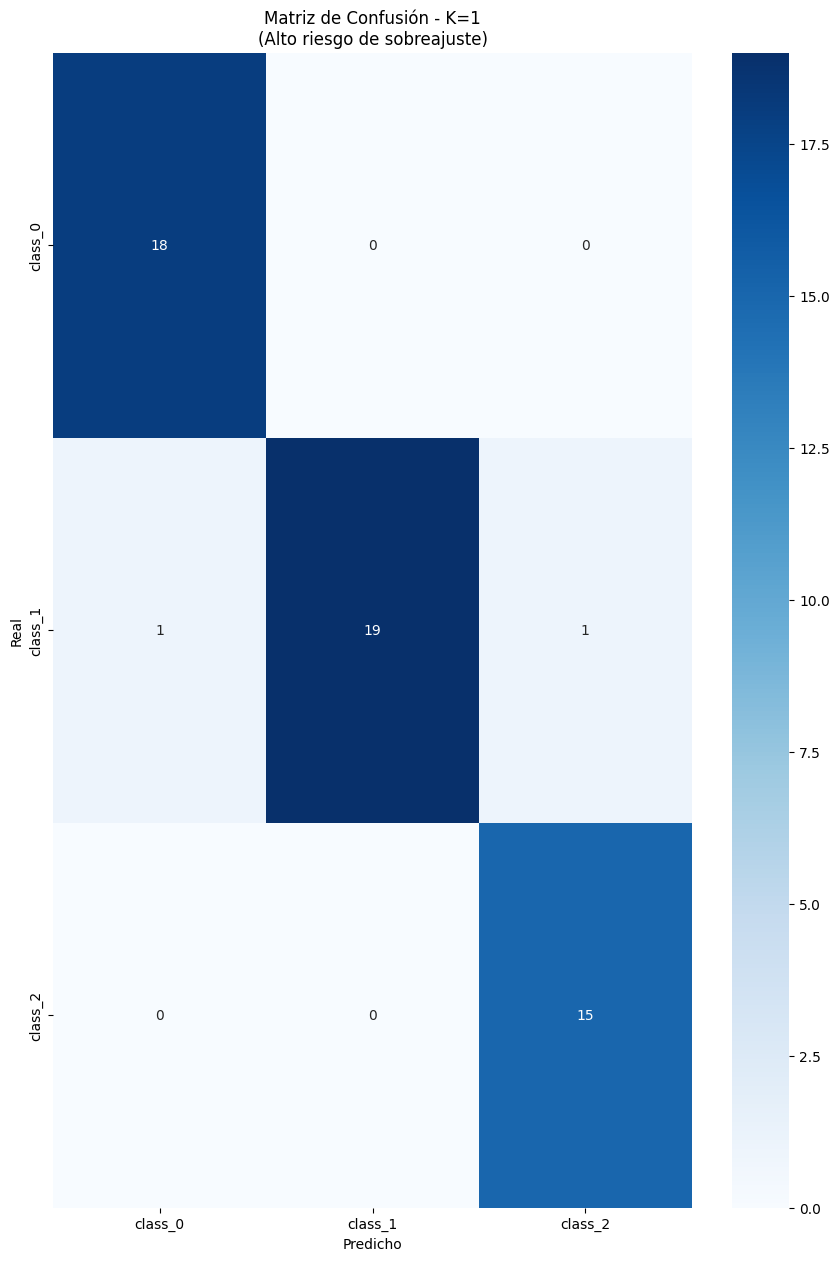

In [3]:
# =============================================================================
# 2. MODELO KNN CON K=1 (CASO EXTREMO - SOBREAJUSTE)
# =============================================================================
print("\n" + "=" * 70)
print("2. KNN CON K=1 - VECINO MÁS CERCANO")
print("=" * 70)


# Crear y entrenar modelo K=1
knn_k1 = KNeighborsClassifier(n_neighbors=1)
knn_k1.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_pred_k1 = knn_k1.predict(X_test_scaled)
y_pred_proba_k1 = knn_k1.predict_proba(X_test_scaled)

accuracy_k1 = accuracy_score(y_test, y_pred_k1)

print("MODELO K=1 (Vecino Más Cercano):")
print(f"   - Precisión en entrenamiento: {knn_k1.score(X_train_scaled, y_train):.4f}")
print(f"   - Precisión en prueba: {accuracy_k1:.4f}")

print("\nREPORTE DE CLASIFICACIÓN - K=1:")
print(classification_report(y_test, y_pred_k1, target_names=wine.target_names))

# Matriz de confusión
cm_k1 = confusion_matrix(y_test, y_pred_k1)
plt.figure(figsize=(35, 15))

plt.subplot(1, 3, 1)
sns.heatmap(cm_k1, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title('Matriz de Confusión - K=1\n(Alto riesgo de sobreajuste)')
plt.ylabel('Real')
plt.xlabel('Predicho')



3. KNN CON K=5 - VOTACIÓN DE 5 VECINOS
MODELO K=5 (Votación de 5 Vecinos):
   - Precisión en entrenamiento: 0.9839
   - Precisión en prueba: 0.9444

REPORTE DE CLASIFICACIÓN - K=5:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



Text(0.5, 135.5815972222222, 'Predicho')

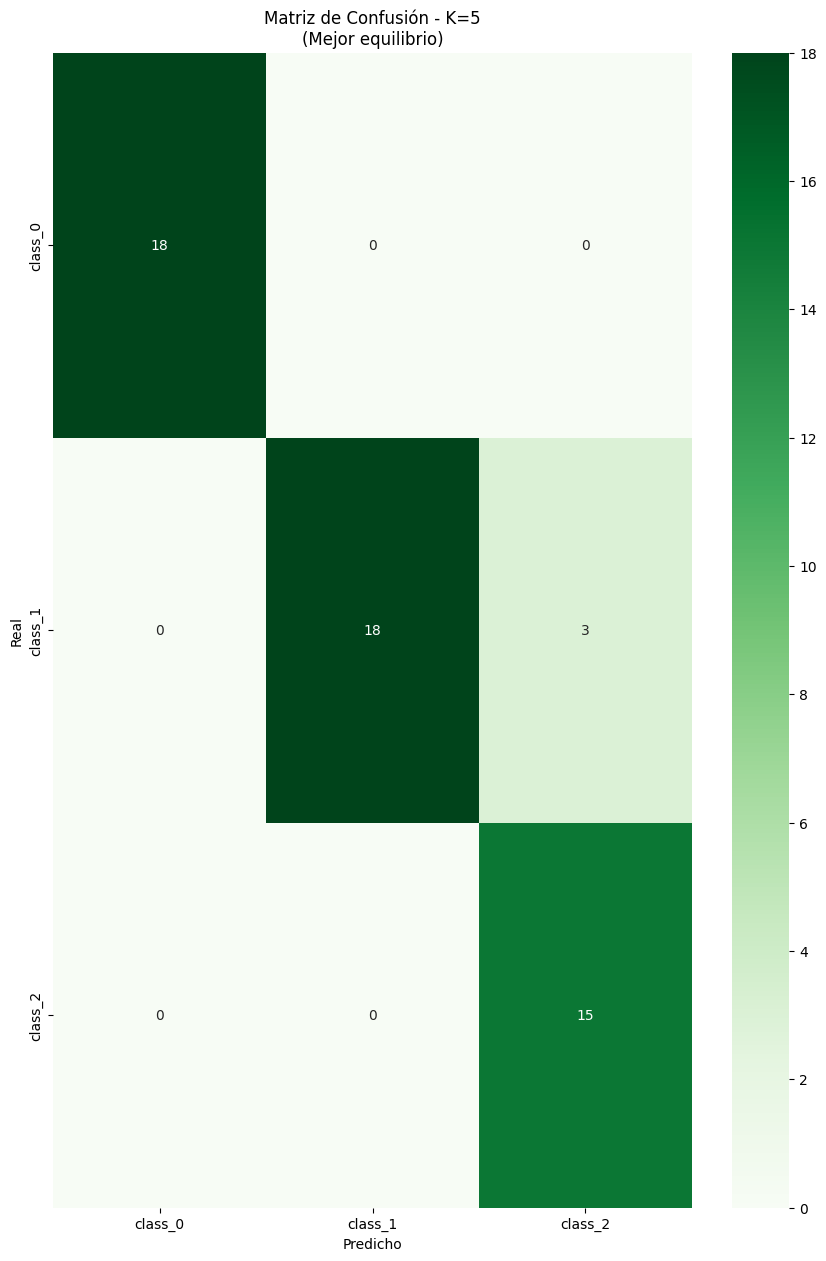

In [4]:
# =============================================================================
# 3. MODELO KNN CON K=5 (VALOR EQUILIBRADO)
# =============================================================================
print("\n" + "=" * 70)
print("3. KNN CON K=5 - VOTACIÓN DE 5 VECINOS")
print("=" * 70)

# Crear y entrenar modelo K=5
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_pred_k5 = knn_k5.predict(X_test_scaled)
y_pred_proba_k5 = knn_k5.predict_proba(X_test_scaled)

accuracy_k5 = accuracy_score(y_test, y_pred_k5)

print("MODELO K=5 (Votación de 5 Vecinos):")
print(f"   - Precisión en entrenamiento: {knn_k5.score(X_train_scaled, y_train):.4f}")
print(f"   - Precisión en prueba: {accuracy_k5:.4f}")

print("\nREPORTE DE CLASIFICACIÓN - K=5:")
print(classification_report(y_test, y_pred_k5, target_names=wine.target_names))

# Matriz de confusión
cm_k5 = confusion_matrix(y_test, y_pred_k5)

plt.figure(figsize=(35, 15))
plt.subplot(1, 3, 2)
sns.heatmap(cm_k5, annot=True, fmt='d', cmap='Greens',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title('Matriz de Confusión - K=5\n(Mejor equilibrio)')
plt.ylabel('Real')
plt.xlabel('Predicho')




4. COMPARACIÓN: K=1 vs K=5
COMPARACIÓN DETALLADA:
    K  Precisión_Entrenamiento  Precisión_Prueba  Diferencia
0   2                 1.000000          0.962963    0.037037
1  11                 0.983871          0.944444    0.039427

RESULTADOS CLAVE:
   K=1 - Precisión Prueba: 0.9630 (96.30%)
   K=5 - Precisión Prueba: 0.9444 (94.44%)
   Diferencia: -0.0185


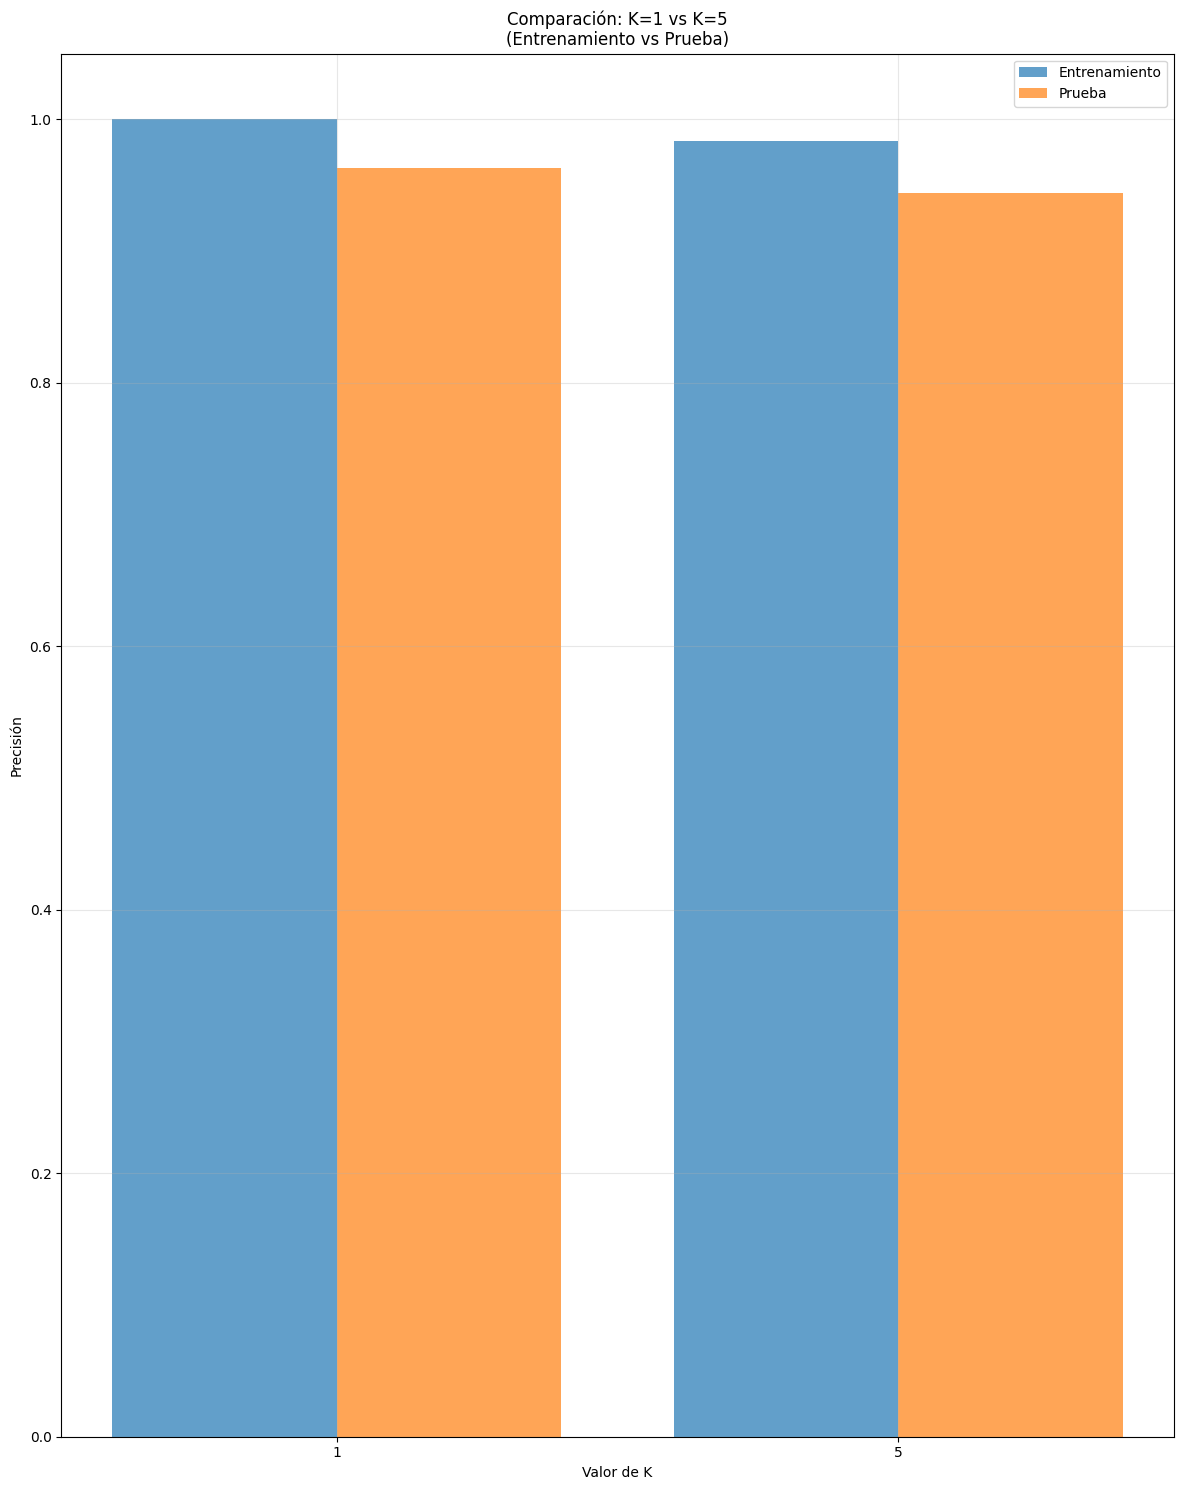

In [5]:
# =============================================================================
# 4. COMPARACIÓN Y CONCLUSIÓN
# =============================================================================
print("\n" + "=" * 70)
print("4. COMPARACIÓN: K=1 vs K=5")
print("=" * 70)

# Comparación directa
comparison = pd.DataFrame({
    'K': [2, 11],
    'Precisión_Entrenamiento': [
        knn_k1.score(X_train_scaled, y_train),
        knn_k5.score(X_train_scaled, y_train)
    ],
    'Precisión_Prueba': [accuracy_k1, accuracy_k5],
    'Diferencia': [
        knn_k1.score(X_train_scaled, y_train) - accuracy_k1,
        knn_k5.score(X_train_scaled, y_train) - accuracy_k5
    ]
})

print("COMPARACIÓN DETALLADA:")
print(comparison)

print(f"\nRESULTADOS CLAVE:")
print(f"   K=1 - Precisión Prueba: {accuracy_k1:.4f} ({accuracy_k1*100:.2f}%)")
print(f"   K=5 - Precisión Prueba: {accuracy_k5:.4f} ({accuracy_k5*100:.2f}%)")
print(f"   Diferencia: {accuracy_k5 - accuracy_k1:+.4f}")

# Visualización de la comparación
plt.figure(figsize=(35, 15))
plt.subplot(1, 3, 3)
k_values = [1, 5]
accuracy_test = [accuracy_k1, accuracy_k5]
accuracy_train = [knn_k1.score(X_train_scaled, y_train), 
                  knn_k5.score(X_train_scaled, y_train)]

x_pos = np.arange(len(k_values))
plt.bar(x_pos - 0.2, accuracy_train, 0.4, label='Entrenamiento', alpha=0.7)
plt.bar(x_pos + 0.2, accuracy_test, 0.4, label='Prueba', alpha=0.7)

plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.title('Comparación: K=1 vs K=5\n(Entrenamiento vs Prueba)')
plt.xticks(x_pos, k_values)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


6. BÚSQUEDA DEL VALOR K ÓPTIMO
K ÓPTIMO ENCONTRADO: 11
Precisión con validación cruzada: 0.9757


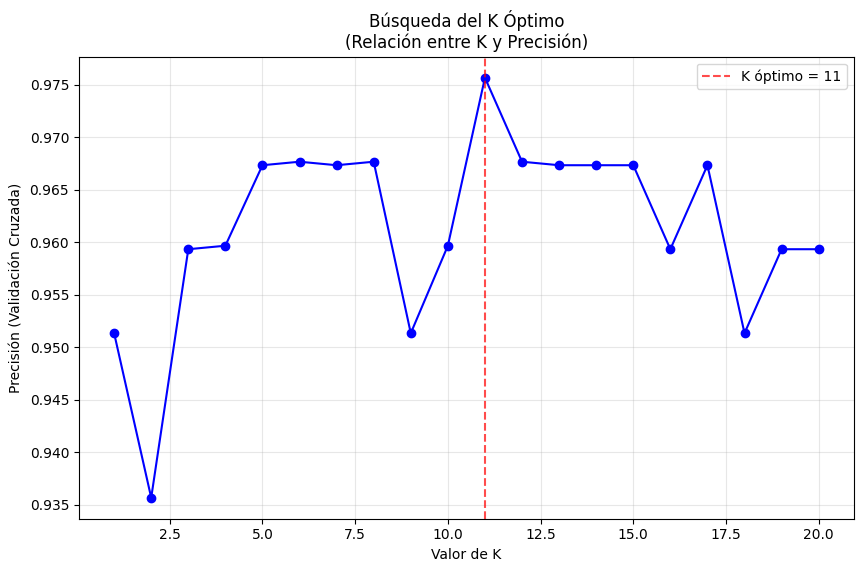


 CONCLUSIÓN FINAL:
   El valor K=11 proporciona el mejor equilibrio
   entre capacidad predictiva y generalización


In [6]:
# =============================================================================
# 5. EXTENSIÓN: BÚSQUEDA DEL K ÓPTIMO
# =============================================================================
print("\n" + "=" * 70)
print("6. BÚSQUEDA DEL VALOR K ÓPTIMO")
print("=" * 70)

from sklearn.model_selection import cross_val_score

# Probar diferentes valores de K
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Usar validación cruzada para evaluación más robusta
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Encontrar K óptimo
optimal_k = k_range[np.argmax(k_scores)]
optimal_score = max(k_scores)

print(f"K ÓPTIMO ENCONTRADO: {optimal_k}")
print(f"Precisión con validación cruzada: {optimal_score:.4f}")

# Graficar relación K vs Precisión
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='-', color='b')
plt.axvline(x=optimal_k, color='r', linestyle='--', alpha=0.7, label=f'K óptimo = {optimal_k}')
plt.xlabel('Valor de K')
plt.ylabel('Precisión (Validación Cruzada)')
plt.title('Búsqueda del K Óptimo\n(Relación entre K y Precisión)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"\n CONCLUSIÓN FINAL:")
print(f"   El valor K={optimal_k} proporciona el mejor equilibrio")
print(f"   entre capacidad predictiva y generalización")